In [3]:
%pylab inline
import numpy as np
import scipy as sp
import scipy.linalg as la



Populating the interactive namespace from numpy and matplotlib


# LU Decomposition for Solving Linear Equations

* We want to understand the factorization ${\bf A} = {\bf LU}$.
* We want to compare the cost of ${\bf LU}$ with other methods, such as Gaussian Elimination.
* We show how to implement an ${\bf LU}$ decomposition algorithm, with and without partial pivoting.
* We will use the ${\bf LU}$ decomposition for solving ${\bf Ax} = {\bf b}$.
* Finaly, we will use ${\bf LU}$ decompositions using library functions.

## Basic Idea: The "Undo" button for Linear Operations

---

Matrix-vector multiplication: given the data \\({\bf x}\\) and the operator \\({\bf A}\\), we can find \\({\bf y}\\) such that \\({\bf y = Ax}\\). Conversely, if we know \\({\bf y}\\) but not \\({\bf x}\\), we can ''undo'' the transformation, by solving
\\({\bf Ax = y}\\) to find \\({\bf x}\\).


### Example: Image Blurring and Recovery (from: CS357 course at UIUC)

The original image displaying a number is stored as a \\(2D\\) array of real numbers between \\(0\\) and \\(1\\) (\\(0\\) represents a white pixel, \\(1\\) represents a black pixel). It has \\(40\\) rows of pixels and \\(100\\) columns of pixels. We can flatten the \\(2D\\) array into a \\(1D\\) array \\(\bf{x}\\) containing the \\(1D\\) data with dimension \\(4000\\). We can then apply blurring operation to data \\(\bf{x}\\), i.e.

$$\bf{y} = \bf{A}\bf{x}$$

where \\(\bf{A}\\) is the blur operator and \\(\bf{y}\\) is the blurred image:  

![](https://drive.google.com/uc?export=view&id=1sLP5-V9jaWpNKvXM7obsQosPcSfImVIB)


To "undo" blurring to recover original image, we solve a linear system of equations using the blur operator \\(\bf{A}\\) and the blurred image \\(\bf{y}\\). The following graph shows the transformation when \\(\bf{y}\\) does not have any noise:  

![](https://drive.google.com/uc?export=view&id=1EzAd868lXe02JaWugENeaWwrFh8kdFit)

It is also possible to recover \\(\bf{x}\\) with a certain extent of noise:

![](https://drive.google.com/uc?export=view&id=1eK6jQZMN3MVIWkXA7UoaWekLMdtoq6bY)



## Back Substitution for Upper Triangular Systems


---


The **_back substitution algorithm_** solves the linear system \\({\bf U x} = {\bf b}\\) where \\({\bf U}\\) is an upper-triangular matrix. The **computational complexity** of back substitution is \\(\bf{O(n^2)}\\).


The code for the back substitution algorithm to solve \\({\bf U x} = {\bf b}\\) is:

```
import numpy as np
def back_sub(U, b):
    """x = back_sub(U, b) is the solution to U x = b
       U must be an upper-triangular matrix
       b must be a vector of the same leading dimension as U
    """
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(i+1, n):
            tmp -= U[i,j] * x[j]
        x[i] = tmp / U[i,i]
    return x

```


## Forward Substitution for Lower Triangular Systems


---

The **_forward substitution algorithm_** solves the linear system \\({\bf Lx} = {\bf b}\\) where \\({\bf L}\\) is a lower triangular matrix. It is the reversed version of back substitution. Like the back substitution, there are also \\(n\\) divisions, \\(\frac{n(n-1)}{2}\\) subtractions / additions, and \\(\frac{n(n-1)}{2}\\) multiplications, hence the **computational complexity** is \\(\bf{O(n^2)}\\).

The code for the forward substitution algorithm to solve \\({\bf L x} = {\bf b}\\) is:

```
import numpy as np
def forward_sub(L, b):
    """x = forward_sub(L, b) is the solution to L x = b
       L must be a lower-triangular matrix
       b must be a vector of the same leading dimension as L
    """
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        tmp = b[i]
        for j in range(i):
            tmp -= L[i,j] * x[j]
        x[i] = tmp / L[i,i]
    return x

```


## LU Decomposition Definition


---


To solve \\({\bf A x} = {\bf b}\\) we can perform ${\bf LU}$ factorization: given an \\(n \times n\\) matrix \\(\bf{A}\\), the **_LU decomposition_** of a matrix \\({\bf A}\\) is the pair of matrices \\({\bf L}\\) and \\({\bf U}\\) such that:

1.  \\({\bf A} = {\bf LU}\\)
2.  \\({\bf L}\\) is a lower-triangular matrix with all diagonal entries equal to 1
3.  \\({\bf U}\\) is an upper-triangular matrix.

The LU decomposition may not exist for a matrix \\({\bf A}\\). The LU decomposition provides an efficient means of solving linear equations.


## Solving LU-Decomposed Linear Systems

---

Knowing the LU decomposition for a matrix \\({\bf A}\\) allows us to solve the linear system \\({\bf A x} = {\bf b}\\) using a combination of forward and back substitution:

$$\begin{aligned} {\bf A x} &= {\bf b} \\\\ {\bf L U x} &= {\bf b} \\\\ {\bf U x} &= {\bf L}^{-1} {\bf b} \\\\ {\bf x} &= {\bf U}^{-1} ({\bf L}^{-1} {\bf b}), \end{aligned}$$

where we first evaluate \\({\bf L}^{-1} {\bf b}\\) using forward substitution and then evaluate \\({\bf x} = {\bf U}^{-1} ({\bf L}^{-1} {\bf b})\\) using back substitution.

An equivalent way to write this is to introduce a new vector \\({\bf y}\\) defined by \\(\bf{y} = {\bf U x}\\). Assuming the LU factorization of matrix \\(\bf{A}\\) is known, we can solve the general system

$$\bf{LU \hspace{1mm} x = b}$$

By solving two triangular systems:

$$\bf{Ly=b} \hspace{5mm} {\Rightarrow^{\text{Solve for } \bf{y}}} \hspace{5mm} \text{Forward substitution with complexity } O(n^2)$$
$$\bf{Ux=y} \hspace{5mm} {\Rightarrow^{\text{Solve for } \bf{x}}} \hspace{5mm} \text{Back substitution with complexity } O(n^2)$$

We have thus replaced \\({\bf A x} = {\bf b}\\) with _two_ linear systems: \\({\bf L y} = {\bf b}\\) and \\({\bf U x} = {\bf y}\\). These two linear systems can then be solved one after the other using forward and back substitution.
The number of operations for the LU algorithm is \\(O(n^2)\\) as \\(n \to \infty\\).

The **_LU solve algorithm_** code for solving the linear system \\({\bf L U x} = {\bf b}\\) is:

```
import numpy as np
def lu_solve(L, U, b):
    """x = lu_solve(L, U, b) is the solution to L U x = b
       L must be a lower-triangular matrix
       U must be an upper-triangular matrix of the same size as L
       b must be a vector of the same leading dimension as L
    """
    y = forward_sub(L, b)
    x = back_sub(U, y)
    return x

```


## The LU Decomposition Algorithm

---

Given a matrix \\({\bf A}\\) there are many different algorithms to find the matrices \\({\bf L}\\) and \\({\bf U}\\) for the LU decomposition:

$$
\begin{aligned} \begin{bmatrix} a_{11} & \boldsymbol{a}_{12} \\ \boldsymbol{a}_{21} & {\bf A}_{22} \end{bmatrix} &= \begin{bmatrix} 1 & \boldsymbol{0} \\ \boldsymbol{\ell}_{21} & {\bf L}_{22} \end{bmatrix} \begin{bmatrix} u_{11} & \boldsymbol{u}_{12} \\ \boldsymbol{0} & {\bf U}_{22} \end{bmatrix} \\ &= \begin{bmatrix} u_{11} & \boldsymbol{u}_{12} \\ u_{11} \boldsymbol{\ell}_{21} & (\boldsymbol{\ell}_{21} \boldsymbol{u}_{12} + {\bf L}_{22} {\bf U}_{22}) \end{bmatrix}, \end{aligned}
$$

where the entry $a_{11}$ is a scalar, \\(\boldsymbol{a}_{12}\\) is a \\(1 \times (n-1)\\) row vector, \\(\boldsymbol{a}_{12}\\) is an \\((n-1) \times 1\\) column vector, and \\({\bf A}_{22}\\) is an \\((n-1) \times (n-1)\\) matrix, and:

$$\begin{aligned} a_{11} &= u_{11} \\ \boldsymbol{a}_{12} &= \boldsymbol{u}_{12} \\ \boldsymbol{a}_{21} &= u_{11} \boldsymbol{\ell}_{21} \\ A_{22} &= \boldsymbol{\ell}_{21} \boldsymbol{u}_{12} + {\bf L}_{22} {\bf U}_{22}. \end{aligned}$$

These four equations can be solved for the components of the \\({\bf L}\\) and \\({\bf U}\\) matrices as:

$$\begin{aligned} u_{11} &= a_{11}\\ \boldsymbol{u}_{12} &= \boldsymbol{a}_{12} \\ \boldsymbol{\ell}_{21} &= \frac{1}{u_{11}} \boldsymbol{a}_{21} \\ {\bf L}_{22} {\bf U}_{22} &= \underbrace{ {\bf A}_{22} - \boldsymbol{a}_{21} (a_{11})^{-1} \boldsymbol{a}_{12}}_{\text{ }}. \end{aligned}$$

where the first row of \\(\bf{U}\\) is the first row of \\(\bf{A}\\),
the first column of \\(\bf{L}\\) is \\(\frac{\text{the first column of }\textbf{A}}{u_{11}}\\), and  \\({\bf L}_{22} {\bf U}_{22}\\) needs another factorization.

In other words, the first three equations above can be immediately evaluated to give the first row and column of \\({\bf L}\\) and \\({\bf U}\\). The last equation can then have its right-hand-side evaluated, which gives \\({\bf L}_{22} {\bf U}_{22} = {\bf A}_{22} - \boldsymbol{a}_{21} (a_{11})^{-1} \boldsymbol{a}_{12}\\), which is an \\((n-1) \times (n-1)\\) LU decomposition problem which we can be recursively solved:

```
def lu_decomp(A):
    """(L, U) = lu_decomp(A) is the LU decomposition A = L U
       A is any matrix
       L will be a lower-triangular matrix with 1 on the diagonal, the same shape as A
       U will be an upper-triangular matrix, the same shape as A
    """
    n = A.shape[0]
    if n == 1:
        L = np.array([[1]])
        U = A.copy()
        return (L, U)

    A11 = A[0,0]
    A12 = A[0,1:]
    A21 = A[1:,0]
    A22 = A[1:,1:]

    L11 = 1
    U11 = A11

    L12 = np.zeros(n-1)
    U12 = A12.copy()

    L21 = A21.copy() / U11
    U21 = np.zeros(n-1)

    S22 = A22 - np.outer(L21, U12)
    (L22, U22) = lu_decomp(S22)

    L = np.block([[L11, L12], [L21, L22]])
    U = np.block([[U11, U12], [U21, U22]])
    return (L, U)

```

Here we also show the non-recursive "Doolitte" method:

```
def lu_decomp(A, LOUD=True):
    '''Compute LU (Doolitte) decomposition of A

    Args:
        A: N by N array

    Returns:
        L: N by N array
        U: N by N array
    '''

    # Check dimensions
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow

    # Allocate L as identify matrix
    L = np.eye(N)

    # Copy A into U
    U = A.copy()

    # Loop over columns
    for c in range(0,N):

        # Loop over rows
        for r in range(c+1,N):

            # Extract row to modify
            mod_row = U[r,:]

            # Calculate factor (just like Gaussian Elimination)
            factor = mod_row[c]/U[c,c]

            # Save factor into L
            L[r,c] = factor

            # Perform elimination, save into U
            mod_row -= factor*U[c]

            #mod_row = U[r-1,:]

            if LOUD:
                print("After working on column",c,"and row",r)
                print("L = \n",L)
                print("U = \n",U)
                print("\n")
    return L,U
```

The code for the **_linear solver using LU decomposition_** is:

```
import numpy as np
def linear_solve_without_pivoting(A, b):
    """x = linear_solve_without_pivoting(A, b) is the solution to A x = b (computed without pivoting)
       A is any matrix
       b is a vector of the same leading dimension as A
       x will be a vector of the same leading dimension as A
    """
    (L, U) = lu_decomp(A)
    x = lu_solve(L, U, b)
    return x

```


In [5]:
import numpy as np
def back_sub(U, b):
    """x = back_sub(U, b) is the solution to U x = b
       U must be an upper-triangular matrix
       b must be a vector of the same leading dimension as U
    """
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(i+1, n):
            tmp -= U[i,j] * x[j]
        x[i] = tmp / U[i,i]
    return x

def forward_sub(L, b):
    """x = forward_sub(L, b) is the solution to L x = b
       L must be a lower-triangular matrix
       b must be a vector of the same leading dimension as L
    """
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        tmp = b[i]
        for j in range(i):
            tmp -= L[i,j] * x[j]
        x[i] = tmp / L[i,i]
    return x

def lu_solve(L, U, b):
    """x = lu_solve(L, U, b) is the solution to L U x = b
       L must be a lower-triangular matrix
       U must be an upper-triangular matrix of the same size as L
       b must be a vector of the same leading dimension as L
    """
    y = forward_sub(L, b)
    x = back_sub(U, y)
    return x

def lu_decomp(A, LOUD=True):
    '''Compute LU (Doolitte) decomposition of A

    Args:
        A: N by N array

    Returns:
        L: N by N array
        U: N by N array
    '''

    # Check dimensions
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow

    # Allocate L as identify matrix
    L = np.eye(N)

    # Copy A into U
    U = A.copy()

    # Loop over columns
    for c in range(0,N):

        # Loop over rows
        for r in range(c+1,N):

            # Extract row to modify
            mod_row = U[r,:]

            # Calculate factor (just like Gaussian Elimination)
            if U[c, c] == 0:
                raise ZeroDivisionError("Zero pivot encountered. Cannot factorize.")
            factor = mod_row[c]/U[c,c]

            # Save factor into L
            L[r,c] = factor

            # Perform elimination, save into U
            mod_row -= factor*U[c]

            #mod_row = U[r-1,:]

            if LOUD:
                print("After working on column",c,"and row",r)
                print("L = \n",L)
                print("U = \n",U)
                print("\n")
    return L,U

def linear_solve_without_pivoting(A, b):
    """x = linear_solve_without_pivoting(A, b) is the solution to A x = b (computed without pivoting)
       A is any matrix
       b is a vector of the same leading dimension as A
       x will be a vector of the same leading dimension as A
    """
    (L, U) = lu_decomp(A, LOUD = False)
    x = lu_solve(L, U, b)
    return x

In [ ]:
A = np.array([[2,1,1,0],[4,3,3,1],[8,7,9,5],[6,7,9,8]], dtype=float)
b = np.array([1,2,3,4], dtype=float)
linear_solve_without_pivoting(A, b)

array([ 1. ,  0.5, -1.5,  1. ])

In [ ]:
x = np.linalg.solve(A, b)
x

array([ 1. ,  0.5, -1.5,  1. ])

In [ ]:
A = np.random.rand(4,4)
print("A = \n",A,"\n")

b = np.random.rand(4)
print("b = \n",b,"\n")

x = linear_solve_without_pivoting(A, b)
print(x)
x = np.linalg.solve(A, b)
x

A = 
 [[0.1965432  0.11113026 0.80172531 0.17799968]
 [0.89522935 0.00303988 0.57767951 0.26762565]
 [0.76160007 0.09370908 0.99663928 0.23327586]
 [0.09835395 0.98691889 0.98646141 0.02524747]] 

b = 
 [0.9435315  0.54379972 0.06352596 0.17030429] 

[-2.32290418  1.23911981 -1.14947183 12.26934458]


array([-2.32290418,  1.23911981, -1.14947183, 12.26934458])

In [ ]:
#Example: Matrix for which LU Decomposition Fails

A = np.array([[2 , 8 , 4 , 1],[1 , 4 , 3 , 3],[1 , 2 , 6 , 2],[1 , 3 , 4 , 2]], dtype=float)
b = np.array([1,2,3,4], dtype=float)
x = linear_solve_without_pivoting(A, b)
print(x)

ZeroDivisionError: Zero pivot encountered. Cannot factorize.

### Pivoting

---

The LU decomposition can fail when the pivot entry in the matrix \\({\bf A}\\) is zero or very small compared to other entries. **_Pivoting_** the will be required to mitigate this problem by rearranging the rows and/or columns of \\({\bf A}\\). Here we will only discuss **_simple pivoting_**.


## LU Decomposition with Pivoting

---

For simplicity, we will exchange any row that has a zero on the diagonal with the first row below it that has a nonzero number in that column. Here we have to keep track of the row exchanges by creating a permutation matrix, $\bf P$, by performing the same row exchanges to an identity matrix.

Consider the matrices \\({\bf L}\\), \\({\bf U}\\), and \\({\bf P}\\) such that:
\\({\bf P A} = {\bf LU} \\), where \\({\bf P}\\) is an \\(n \times n\\) permutation matrix. The permutation matrix \\({\bf P}\\) acts to permute the rows of \\({\bf A}\\).

### Solving LUP decomposition linear systems

---

Knowing the LUP decomposition for a matrix \\({\bf A}\\) allows us to solve the linear system \\({\bf A x} = {\bf b}\\) by first applying \\({\bf P}\\) and then using the LU solver. In equations we start by taking \\({\bf A x} = {\bf b}\\) and multiplying both sides by \\({\bf P}\\), giving

$$\begin{aligned} {\bf Ax} &= {\bf b} \\ {\bf PAx} &= {\bf Pb} \\ {\bf LUx} &= {\bf Pb}. \end{aligned}$$

The code for the **_LUP solve algorithm_** to solve the linear system \\({\bf L U x} = {\bf P b}\\) is:


In [6]:
def lup_decomp(A):

    #Get the number of rows
    n = A.shape[0]

    #Allocate space for P, L, and U
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    P = np.eye(n, dtype=np.double)

    #Loop over rows
    for i in range(n):

        #Permute rows if needed
        for k in range(i, n):
            if ~np.isclose(U[i, i], 0.0):
                break
            U[[k, k+1]] = U[[k+1, k]]
            P[[k, k+1]] = P[[k+1, k]]

        #Eliminate entries below i with row
        #operations on U and #reverse the row
        #operations to manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]

    return P, L, U

def lup_solve(P, L, U, b):
    """x = lu_solve(L, U, b) is the solution to L U x = b
       L must be a lower-triangular matrix
       U must be an upper-triangular matrix of the same size as L
       b must be a vector of the same leading dimension as L
    """
    y = forward_sub(L, np.dot(P, b))
    x = back_sub(U, y)
    return x

def linear_solve_with_pivoting(A, b):
    """x = linear_solve_without_pivoting(A, b) is the solution to A x = b (computed without pivoting)
       A is any matrix
       b is a vector of the same leading dimension as A
       x will be a vector of the same leading dimension as A
    """
    (P, L, U) = lup_decomp(A)
    x = lup_solve(P, L, U, b)
    return x

A = np.array([[2 , 8 , 4 , 1],[1 , 4 , 3 , 3],[1 , 2 , 6 , 2],[1 , 3 , 4 , 2]], dtype=float)
b = np.array([1,2,3,4], dtype=float)
x = linear_solve_with_pivoting(A, b)
print(x)

x = np.linalg.solve(A, b)
x


[ 55. -11.  -6.   3.]


array([ 55., -11.,  -6.,   3.])

## Perform LUP decomposition using scipy


In [8]:
# Perform LUP decomposition using scipy
(P, L, U) = la.lu(A)
print("P = \n",P)
print("L = \n",L)
print("U = \n",U)

P = 
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
L = 
 [[ 1.   0.   0.   0. ]
 [ 0.5  1.   0.   0. ]
 [ 0.5 -0.   1.   0. ]
 [ 0.5  0.5  0.   1. ]]
U = 
 [[ 2.    8.    4.    1.  ]
 [ 0.   -2.    4.    1.5 ]
 [ 0.    0.    1.    2.5 ]
 [ 0.    0.    0.    0.75]]


### Matrix Transpose

The *transpose* of $A$ $\in$ $\mathbb{R}^{n \times m}$ is $A^T$ $\in$ $\mathbb{R}^{m \times n}$ with the rows and columns of A interchanged, i.e.$ \mathbf{\{A^T\}_{ij}} =  \mathbf{\{A\}_{ji}}$.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">
<b>Class Activity</b>: Calculate ${\bf P}^{T}$, ${\bf P}^{-1}$, ${\bf P}^{T}{\bf P}$. Describe your observation. Is $\bf P$ an orthogonal matrix? (An orthogonal $A$ matrix satisfies $A^TA = I$)
</div>


**Class Activity**: Is $Q$ matrix below an orthogonal matrix?


In [ ]:
# Create Q
theta = 0.2
Q = np.array([(np.cos(theta), -np.sin(theta)),(np.sin(theta),np.cos(theta))])
print("Q = ")
print(Q)

# Verification
### BEGIN SOLUTION
print("Qinv = \n", linalg.inv(Q))
print("Q^T = \n", Q.transpose())
### END SOLUTION

Q = 
[[ 0.98006658 -0.19866933]
 [ 0.19866933  0.98006658]]
Qinv = 
 [[ 0.98006658  0.19866933]
 [-0.19866933  0.98006658]]
Q^T = 
 [[ 0.98006658  0.19866933]
 [-0.19866933  0.98006658]]


## Determinant of a Matrix

You might recall from linear algebra that there are several ways of computing the determinant of a matrix (e.g. Leibniz formula, Laplace formula, Cramer's rule, etc.); however, none of these are as computationally efficient as using the $\mathbf{LU}$ decomposition and a few properties of determinants to compute the determinate of a matrix $\mathbf{A}$. Recall,

For $\mathbf{A = LU}, \implies \det(\mathbf{A}) = \det(\mathbf{L})\det(\mathbf{U})$

where for an upper (or lower) triangular matrix, the determinate of the matrix is simply the product of the diagonal entries. Therefore, if we solve for $\mathbf{L}$ and $\mathbf{U}$, where there are 1's on the diagonal of the $\mathbf{L}$ matrix, then the determinate of $\mathbf{L}$ is 1. Thus,

$$\det(\mathbf{A}) = 1 \cdot \det(\mathbf{U}) = \prod_{j=1}^{n}u_{jj}$$

Similarly, for a $\mathbf{PLU}$ decomposition,

$$\det(\mathbf{A}) = \det(\mathbf{P})\det(\mathbf{L})\det(\mathbf{U}) = \det(\mathbf{P})\cdot\prod_{j=1}^{n}u_{jj}$$

where
$$
\det(\mathbf{P}) =
\begin{cases}
1, & \textrm{for even number of permutations} \\
-1,& \textrm{for odd number of permutations}
\end{cases}
$$

**Class Activity**: Find the determinant of the $\bf A$:


In [10]:
# a matrix and its det
M = 6
A = np.random.randn(M,M)

# LU
P,L,U = la.lu(A)

# determinant as the product of the diagonals of U
detLU = np.prod( np.diag(U) ) * np.linalg.det(P)

# check against the det function
detNP = np.linalg.det(A)

# compare
print(detLU,detNP)
print(detLU-detNP)

-5.146189112870946 -5.146189112870946
0.0


## Summary

LU factorization is *very* similar to Gaussian elimination:
 * $\mathbf{L}$ matrix saves the scaling factors from Gaussian elimination
 * $\mathbf{U}$ matrix is the same as the reduced matrix
 * $\mathbf{L}$ and $\mathbf{U}$ save all of the steps from matrix reduction, making LU factorization efficient to resolve $\mathbf{A} \vec{x} = \vec{b}$ for many different $\vec{b}$
 * Partial pivoting works the same way for both LU factorization and Gaussian elimination

Solving a linear system with LU factorization is easy:
 * First, perform forward substitution, which exploits that $\mathbf{L}$ is lower triangular
 * Second, perform backward substitution, which exploits that $\mathbf{U}$ is upper triangular

## Invertable Matrix Theorem

Let $A$ be a square $n \times n$ identity matrix. Then the following statements are equivalent:

a. $A$ is an invertible matrix.

b. $A$ is row equivalent to the $n \times n$ identity matrix.

c. $A$ has $n$ pivot positions.

d. The equation $Ax = 0$ has only the trivial solution.

e. The columns of $A$ form a linearly independent set.

f. The linear transformation $x\longmapsto Ax$ is one-to-one.

g. The equation $Ax = b$ has at least one solution for each $b$ in $\mathbb{R}^n$.

h. The columns of $A$ span $\mathbb{R}^n$.

i. The linear transformation $x\longmapsto Ax$ maps $\mathbb{R}^n$ onto $\mathbb{R}^n$.

j. There is an $n \times n$ matrix $C$ such that $CA = I$.

k. There is an $n \times n$ matrix $D$ such that $AD = I$.

l. $A^T$ is an invertible matrix.

**Let $A$ be an $n \times n$ matrix. Then the following statements are each equivalent to the statement that $A$ is an invertible matrix.**

m. The columns of $A$ form a basis of $\mathbb{R}^n$.

n. Col$A$ = $\mathbb{R}^n$

o. dim Col$A$ = $n$

p. rank $A$ = $n$

q. Nul$A$ = $\{0\}$

r. dim Nul$A$ = $0$

**Let $A$ be an $n \times n$ matrix. Then $A$ is invertible if and only if:**

s. The number 0 is *not* an eigenvalue of $A$.

t. The determinant of $A$ is *not* zero.

**Let $A$ be an $n \times n$ matrix. Then the following statements are each equivalent to the statement that $A$ is an invertible matrix.**

u. (Col$A$)$^\perp$ = $\{0\}$.

v. (Nul$A$)$^\perp$ = $\mathbb{R}^n$.

w. Row$A$ = $\mathbb{R}^n$.

x. $A$ has $n$ nonzero singular values.

# Matrix Multiplication


Matrix-vector multiplication is a fundamental operation in machine learning, particularly within the context of neural networks and various linear algebra-based algorithms. It forms the core of many computations, especially during the forward and backward passes of neural networks.

#### Example:
Linear Layers (Dense Layers): The primary computation in a linear layer involves multiplying an input vector (or a batch of input vectors represented as a matrix) by a weight matrix. This operation calculates the weighted sum of inputs for each neuron in the layer.
$$
\mathbf{Y} = w_0 + X\,w
$$

Multiplying two matrices $A$ $\in$ $\mathbb{R}^{n \times m}$ and $B$ $\in$ $\mathbb{R}^{m \times p}$ leads to the product $C \in$ $\mathbb{R}^{n \times p}$ with elements $ \mathbf{\{C\}_{ij}}$ = $\sum_{k=1}^m  \mathbf{\{A\}_{ik}}  \mathbf{\{B\}_{kj}}$. This operation is defined only if the number of columns in $A$ and rows of $B$ is the same.

In [ ]:
#n = 4096
n = 32
A = np.array(np.random.randn(n,n), order='F')
B = np.array(np.random.randn(n,n), order='F')

A.shape[1] == B.shape[0] # ensures two matrices are compatible

C = np.zeros((n,n))

for i in range(n):
  for k in range(n):
    for j in range(n):
      C[i,k]= C[i,k] + A[i,j]*B[j,k]

np.linalg.norm(A@B - C)

np.float64(3.0350759810859074e-14)

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">
<b>Class Activity</b>: What is the computational time for using the code above for matrix multiplication?
</div>

Below are various ways of multiplying matrices:

In [ ]:
%timeit C_np = np.matmul(A,B) # numpy

4.53 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## View Your Configuration

You can view what BLAS and LAPACK libraries NumPy is using.
The command ``np.__config__.show()`` in NumPy displays information about the libraries and system details on which the NumPy installation was built. This includes details about the linked BLAS (Basic Linear Algebra Subprograms) and LAPACK (Linear Algebra Package) implementations, which are crucial for high-performance numerical computations in NumPy.


In [ ]:
print(np.__config__.show())
print(sp.__config__.show())

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /opt/_internal/cpython-3.12.2/lib/python3.12/site-packages/scipy_openblas64/include
    lib directory: /opt/_internal/cpython-3.12.2/lib/python3.12/site-packages/scipy_openblas64/lib
    name: scipy-openblas
    openblas configuration: OpenBLAS 0.3.27  USE64BITINT DYNAMIC_ARCH NO_AFFINITY
      Zen MAX_THREADS=64
    pc file directory: /project/.openblas
    version: 0.3.27
  lapack:
    detection method: pkgconfig
    found: true
    include directory: /opt/_internal/cpython-3.12.2/lib/python3.12/site-packages/scipy_openblas64/include
    lib directory: /opt/_internal/cpython-3.12.2/lib/python3.12/site-packages/scipy_openblas64/lib
    name: scipy-openblas
    openblas configuration: OpenBLAS 0.3.27  USE64BITINT DYNAMIC_ARCH NO_AFFINITY
      Zen MAX_THREADS=64
    pc file directory: /project/.openblas
    version: 0.3.27
Compilers:
  c:
    commands: cc
    linker: ld.bfd
    name: gcc


In [ ]:
from scipy.linalg import blas

%timeit C_blas = blas.dgemm(1.0, A, B) # blas

3.01 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
np.linalg.norm(np.matmul(A,B) - blas.dgemm(1.0, A, B))

np.float64(0.0)

In [ ]:
%timeit C_np = np.dot(A, B) # numpy

3.94 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit C = A.dot(B) # pyhton

4.58 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit C = A@B # pyhton

4.39 µs ± 94.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
import torch
A_t = torch.from_numpy(A)
B_t = torch.from_numpy(B)

%timeit C_p = torch.matmul(A_t, B_t)

7.59 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
import tensorflow as tf
A_tf = tf.convert_to_tensor(A)
B_tf = tf.convert_to_tensor(B)

%timeit C_tf = tf.matmul(A_tf, B_tf)

59.8 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# measure FLOPs of gemm

import time

n = 4096
dtype = np.float64
A = np.array(np.random.randn(n, n), dtype=dtype)
B = np.array(np.random.randn(n, n), dtype=dtype)
print("measuring BLAS Level 3 flops using {}".format(dtype))
t0 = time.time()
C = blas.sgemm(1.0, A, B)
t1 = time.time()
print("time elapsed = {} sec.".format(t1 - t0))
flops = (2 * n**3) / (t1 - t0) # 2 n**3 FLOP - n multiplications and additions per entry of C
print("{:e} FLOPS".format(flops))

measuring BLAS Level 3 flops using <class 'numpy.float64'>
time elapsed = 3.200159788131714 sec.
4.294753e+10 FLOPS


Here's a compact version of LU, with no pivoting:

In [13]:
def LU(A):
    U = np.copy(A)
    m, n = A.shape
    L = np.eye(n)
    for k in range(n-1):
        for j in range(k+1,n):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:n] -= L[j,k] * U[k,k:n]
    return L, U


In [14]:
A = np.array([[2,1,1,0],[4,3,3,1],[8,7,9,5],[6,7,9,8]], dtype=float)
L, U = LU(A)
print("L = \n",L)
print("U = \n",U)
L@U

L = 
 [[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [4. 3. 1. 0.]
 [3. 4. 1. 1.]]
U = 
 [[2. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 2.]
 [0. 0. 0. 2.]]


array([[2., 1., 1., 0.],
       [4., 3., 3., 1.],
       [8., 7., 9., 5.],
       [6., 7., 9., 8.]])

The ``scipy.linalg.lu`` function performs LU decomposition for the general form matrices (matrices that are not necessarily square):

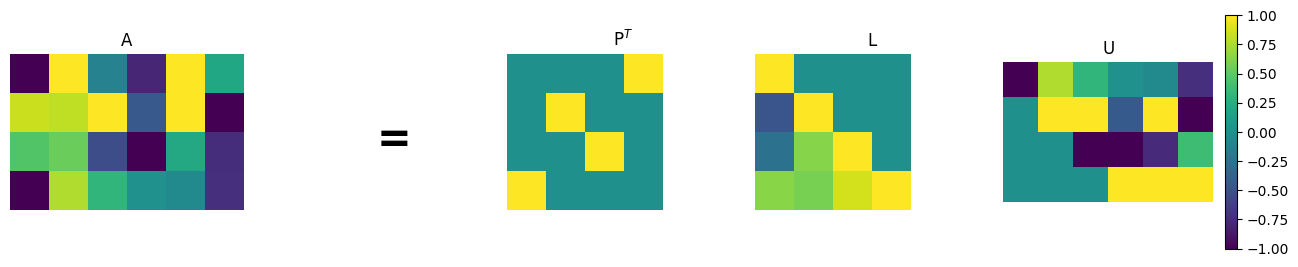

In [11]:
# matrix sizes
m = 4
n = 6

A = np.random.randn(m,n)

P,L,U = sp.linalg.lu(A)

# show the matrices
fig,axs = plt.subplots(1,5,figsize=(13,4))

axs[0].imshow(A,vmin=-1,vmax=1)
axs[0].set_title('A')

axs[1].imshow(np.ones((m,n)),cmap='gray',vmin=-1,vmax=1)
axs[1].text(n/2,m/2,'=',ha='center',fontsize=30,fontweight='bold')
# axs[1].axis('off')

axs[2].imshow(P.T,vmin=-1,vmax=1)
axs[2].set_title(r'P$^T$')

axs[3].imshow(L,vmin=-1,vmax=1)
axs[3].set_title('L')

h = axs[4].imshow(U,vmin=-1,vmax=1)
axs[4].set_title('U')

for a in axs:
  a.axis('off')
  a.set_xlim([-.5,n-.5])
  a.set_ylim([m-.5,-.5])


fig.colorbar(h,ax=axs[-1],fraction=.05)
plt.tight_layout()
plt.savefig('Figure_10_01.png',dpi=300)
plt.show()